In [2]:
import pylizard, matplotlib.pyplot as plt, pastas
%matplotlib inline

In [3]:
code, filt = '16FL0041', 1
p = pylizard.Peilbuis(code, filt)

In [4]:
ho = p.head_total()
knmi_stn = pastas.read.KnmiStation(stns=273, start='1995',  interval='daily')
knmi_stn.download()

rain = knmi_stn.data['RH']
evp = knmi_stn.data['EV24']

In [5]:
ml = pastas.Model(ho)
sm1 = pastas.StressModel(rain, pastas.Gamma, name='rain', settings='prec')
sm2 = pastas.StressModel(evp, pastas.Gamma,  name='evap', settings='evap', up=False)
ml.add_stressmodel(sm1)
ml.add_stressmodel(sm2)
ml.solve(tmin='2003')

c:\python36\lib\site-packages\pastas\stressmodels.py:297: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  h = h.loc[tindex]



Model Results combi                Fit Statistics
============================    ============================
nfev     42                     EVP                    76.77
nobs     5328                   NS                      0.77
noise    NoiseModel             Pearson R2              0.88
tmin     2003-01-01 01:00:00    RMSE                    0.18
tmax     2018-04-04 01:00:00    AIC                    14.35
freq     D                      BIC                    67.00
warmup   3650                   __                          
solver   LeastSquares           ___                         

Parameters (8 were optimized)
                optimal                  stderr     initial vary
rain_A       594.161007   ± 3.44008e+01 (5.79%)  447.465790    1
rain_n         1.606763   ± 1.78988e-02 (1.11%)    1.000000    1
rain_a        68.403377   ± 3.45628e+00 (5.05%)   10.000000    1
evap_A      -583.651023   ± 5.15824e+01 (8.84%) -622.613825    1
evap_n         2.408099  ± 2.86372e-01 (11.8

c:\python36\lib\site-packages\pastas\stressmodels.py:297: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  h = h.loc[tindex]


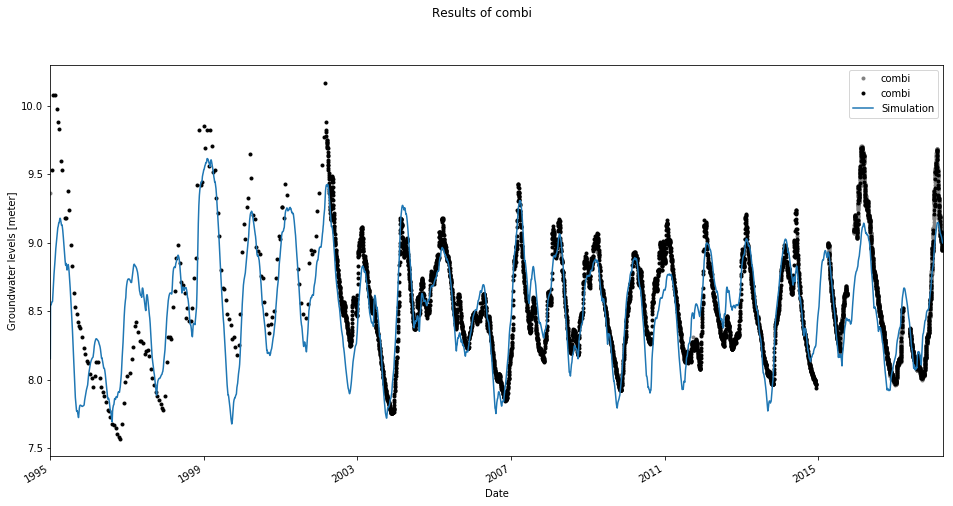

In [6]:
ml.plot(tmin='1995',figsize=(16, 8))
plt.show()

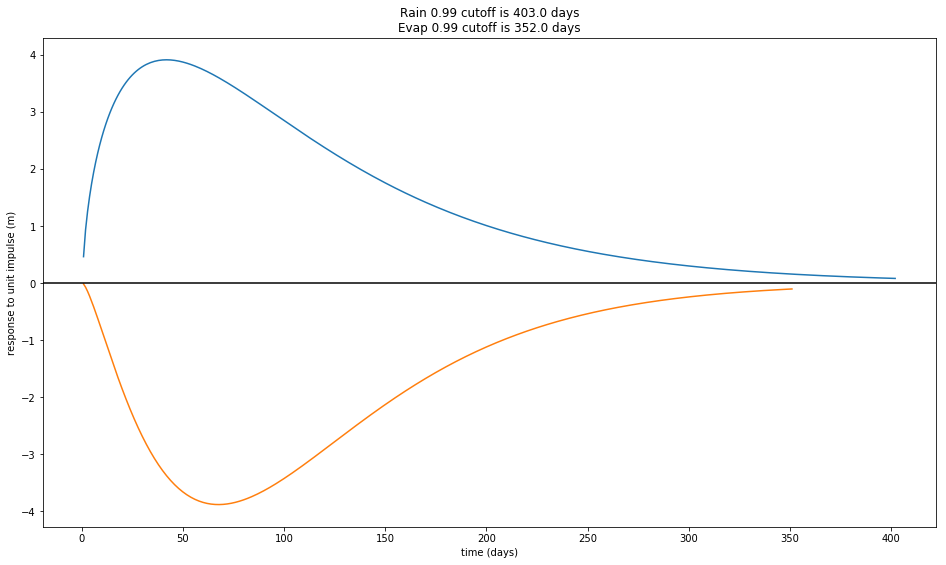

In [10]:
block_rain = ml.get_block_response('rain')
block_evap = ml.get_block_response('evap')
cutoff_rain = sm1.rfunc.cutoff
cutoff_evap = sm2.rfunc.cutoff
tmax_rain = sm1.rfunc.tmax
tmax_evap = sm2.rfunc.tmax

fig, ax = plt.subplots(figsize=[16, 9])
block_rain.plot(ax=ax)
block_evap.plot(ax=ax)
plt.axhline(0, color='k', linestyle='-')

plt.xlabel('time (days)')
plt.ylabel('response to unit impulse (m)')

plt.title('Rain {} cutoff is {} days\n'.format(cutoff_rain, round(tmax_rain))+'Evap {} cutoff is {} days'.format(cutoff_evap, round(tmax_evap)));